In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/home')

Mounted at /home


In [3]:
x = pd.read_csv("/home/Othercomputers/vladerm/ML/ml1_2/0_x.csv", header=None)
y = pd.read_csv("/home/Othercomputers/vladerm/ML/ml1_2/0_y.csv", header=None)
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [4]:
x.shape, y.shape

((387, 5), (387, 1))

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
binary = LinearRegression()

In [7]:
binary.fit(x[[1]], y)

LinearRegression()

In [8]:
binary.coef_

array([[95.52010745]])

In [9]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

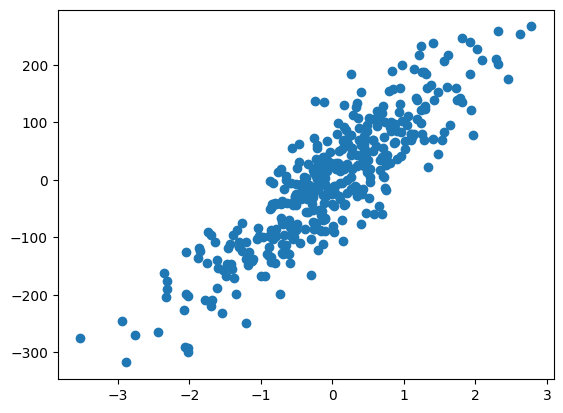

In [10]:
plt.scatter(x[1], y)

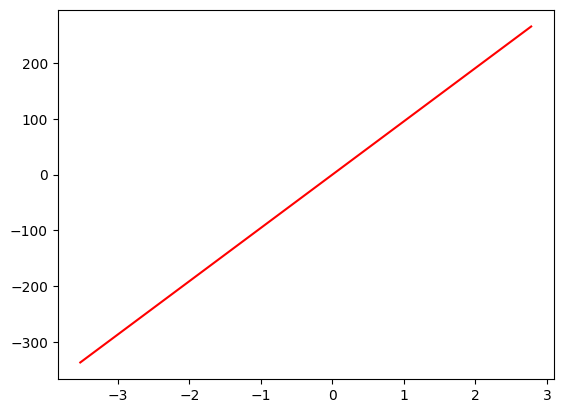

In [11]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [12]:
from sklearn.metrics import r2_score
r2_score(y, binary.predict(x[[1]]))

0.7699743283650629

In [13]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

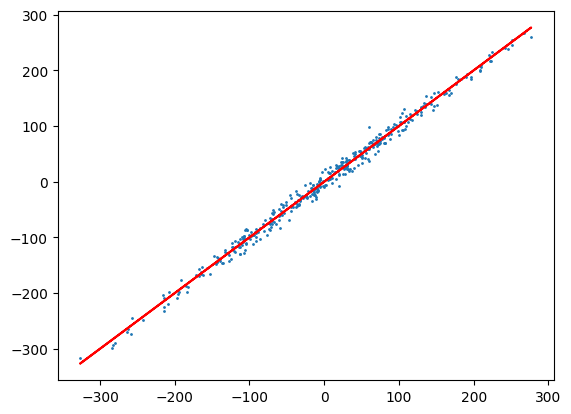

In [14]:
yy = multiple.predict(x)
plt.scatter(yy, y, s=1)
plt.plot(yy, yy, c='r')

Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

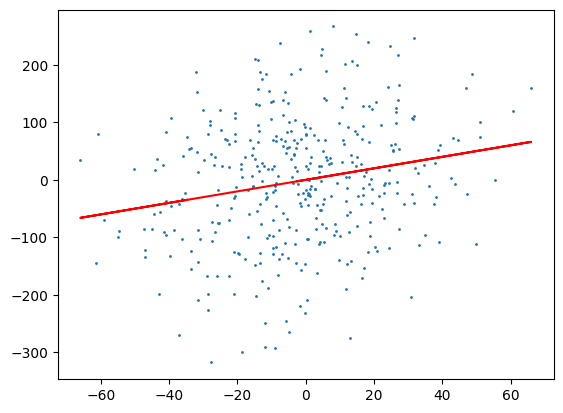

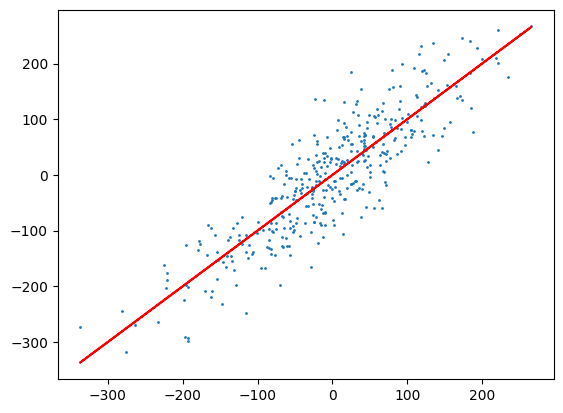

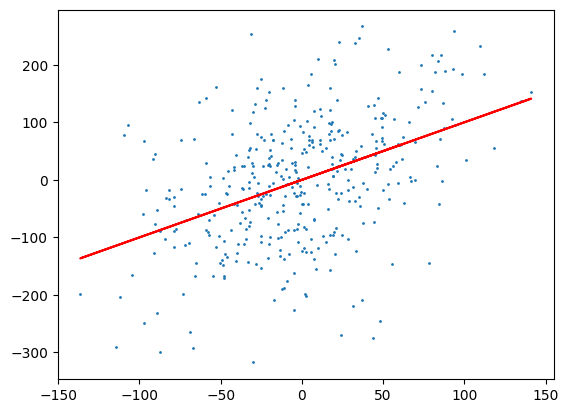

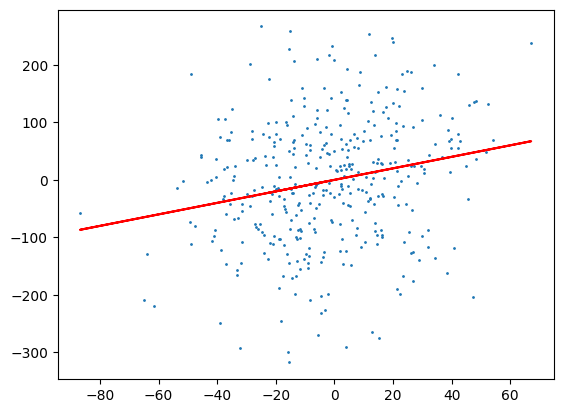

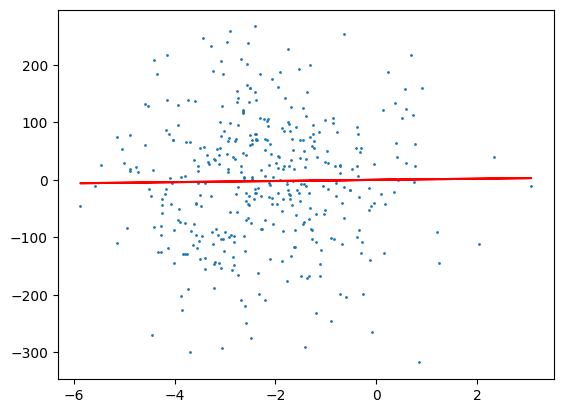

In [35]:
from sklearn.metrics import r2_score

dic = {"Var" : [], "Power" : [], "r2_score" : []}
dic1 = {"Var" : [], "Power" : [], "r2_score" : []}
def app(var, power, r2=100):
    dic["Var"].append(f"x{var + 1}")
    dic["Power"].append(power)
    dic["r2_score"].append(r2)

for i in range(5):
    binary = LinearRegression()
    binary.fit(x[[i]], y)
    yy = binary.predict(x[[i]])
    app(i, 1, r2_score(y, yy))
    plt.scatter(yy, y, s=1)
    plt.plot(yy, yy, c='r')
    plt.show()

Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии

1.51 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


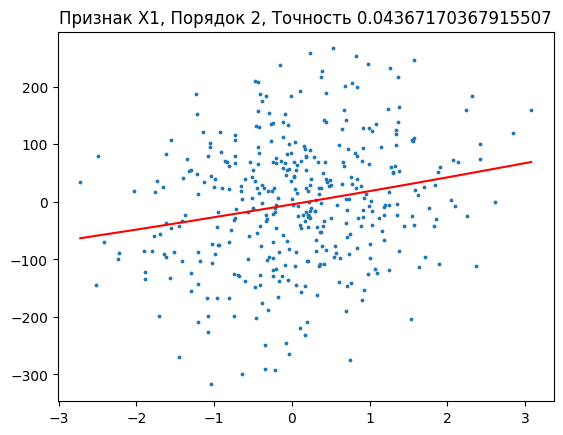

1.52 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


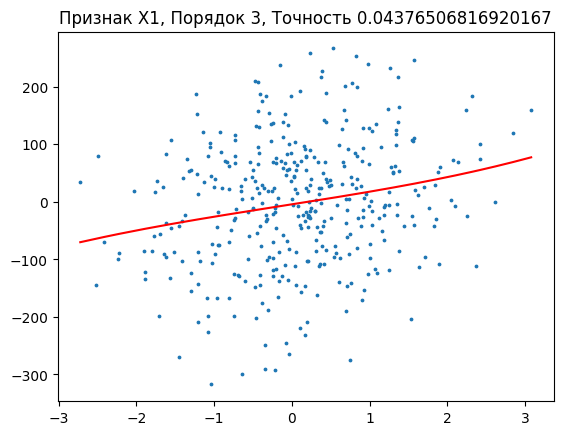

1.9 ms ± 564 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


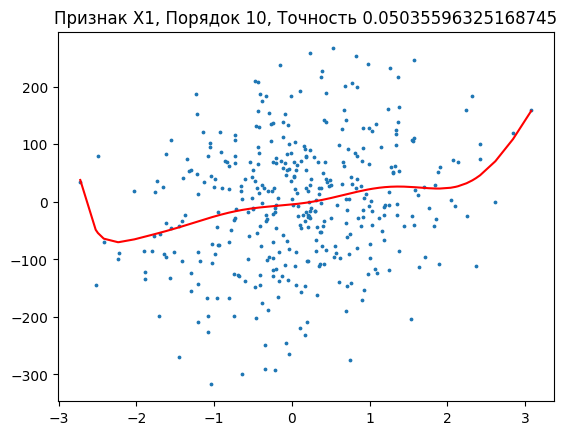

1.52 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


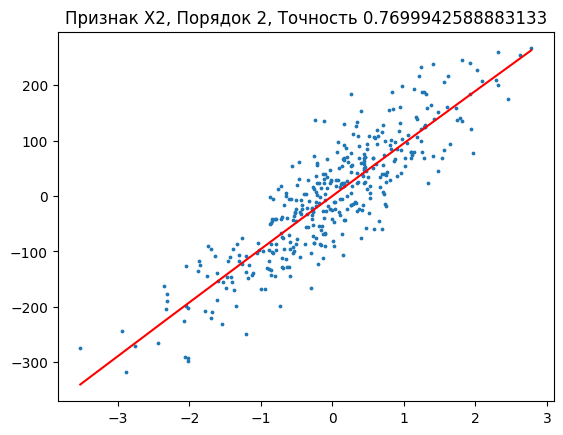

1.55 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


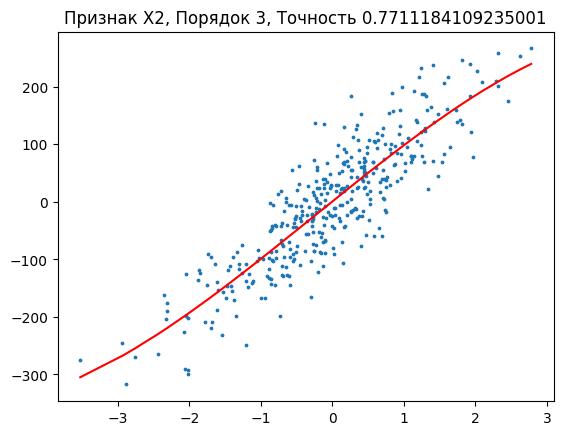

1.65 ms ± 344 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


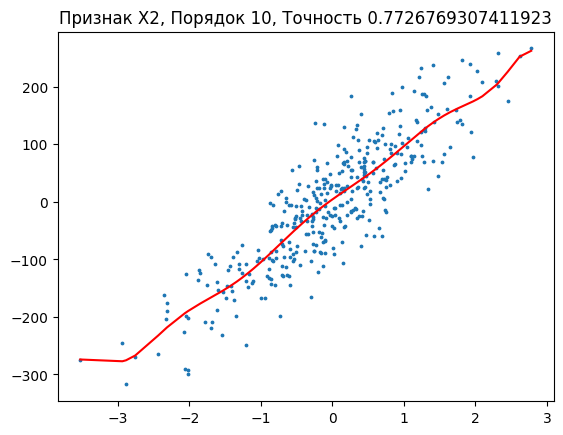

2.1 ms ± 567 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


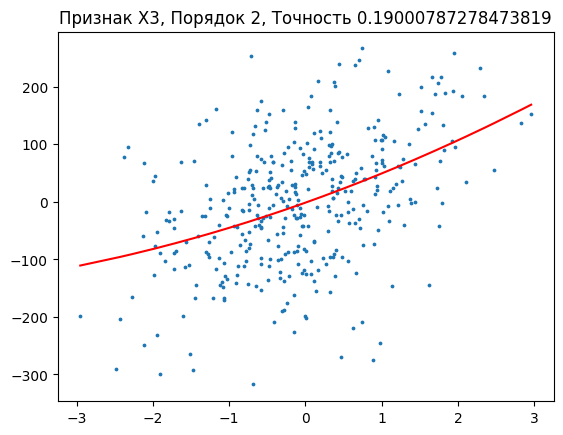

1.88 ms ± 428 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


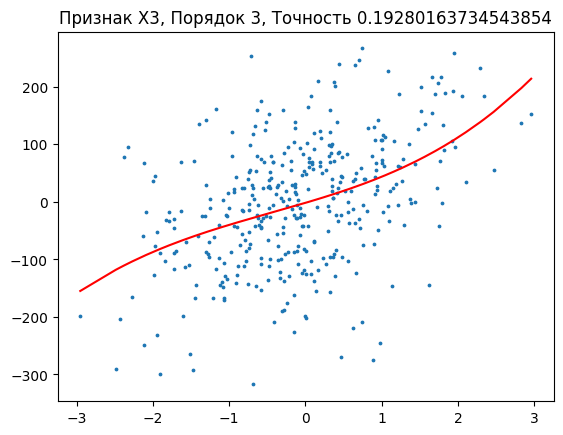

2.24 ms ± 909 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


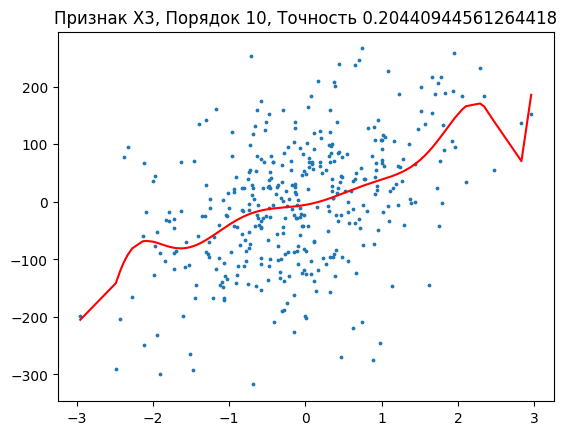

1.5 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


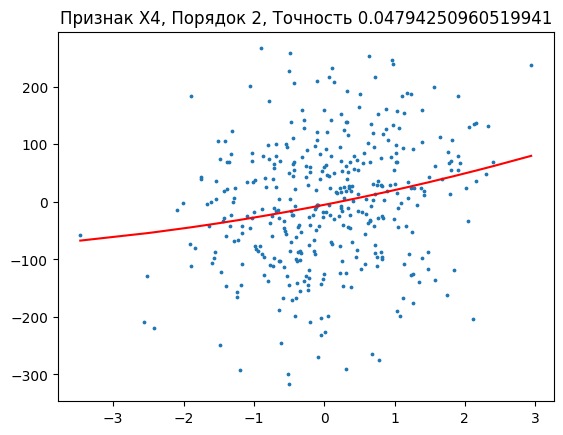

1.87 ms ± 860 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


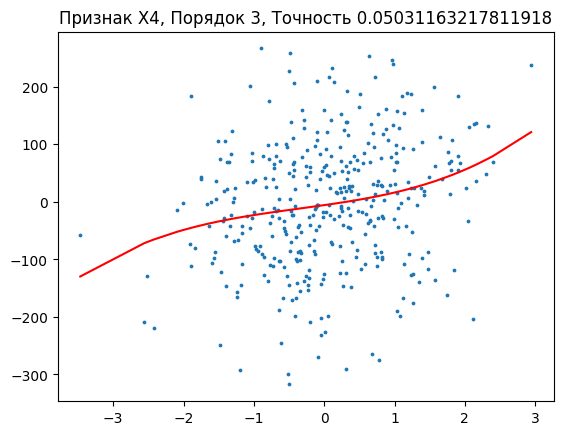

1.57 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


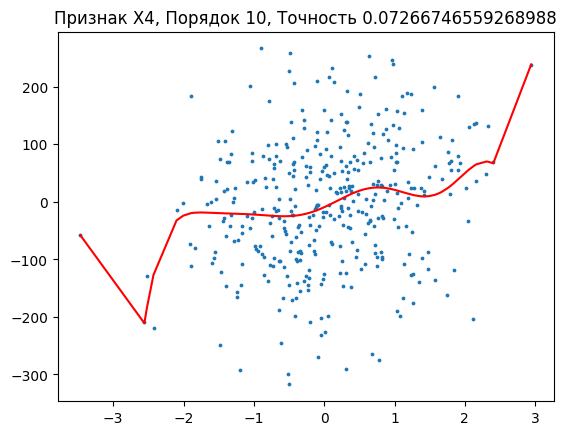

2.08 ms ± 608 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


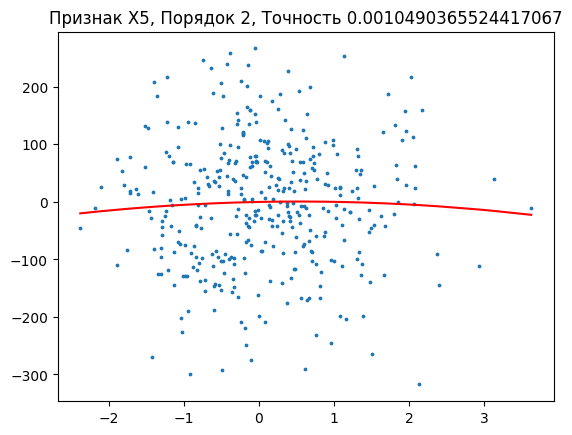

1.68 ms ± 530 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


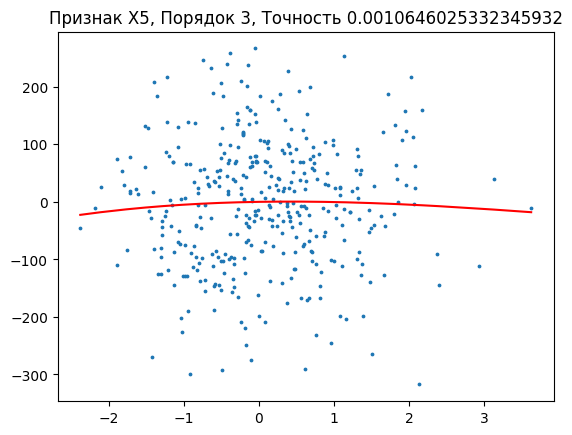

1.56 ms ± 175 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


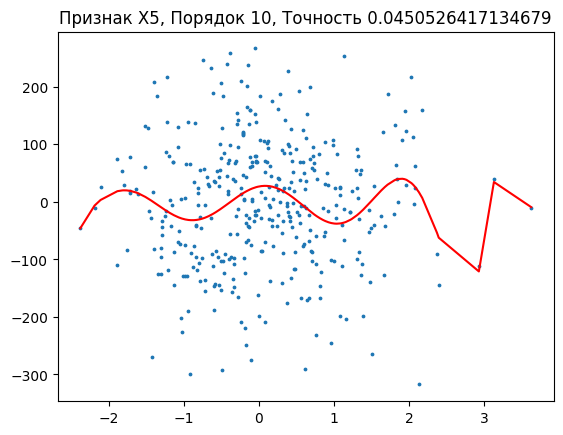

In [46]:
time = []
for i in range(x.shape[1]):
    for degree in [2, 3, 10]:
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        xp = poly_features.fit_transform(x[[i]].values.reshape(-1, 1))
        binary = LinearRegression()
        a = %timeit -o binary.fit(xp, y) ### 6 задание
        time.append(a)                   ### 6 задание
        yy = binary.predict(xp)

        original_x =  x.iloc[:, i]
        sorted_zip = sorted(zip(original_x, yy), key=lambda pair: pair[0])
        x_, yy_ = zip(*sorted_zip)
        app(i, degree, r2_score(y, yy))
        plt.scatter(original_x, y, s=3)
        plt.plot(x_, yy_, color='r')
        plt.title(f"Признак X{i+1}, Порядок {degree}, Точность {r2_score(y, yy)}")
        plt.show()

Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [32]:
df = pd.DataFrame(dic)
df

,Var,Power,r2_score
0,x1,1,0.043643
1,x2,1,0.769974
2,x3,1,0.187945
3,x4,1,0.047470
4,x5,1,0.000172
5,x1,2,0.043672
6,x1,3,0.043765
7,x1,10,0.050356
8,x2,2,0.769994
9,x2,3,0.771118


Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

ВЫВОД:

степень полиноминальной регрессии сильно влияет на время обучения модели

In [ ]:
#сделано в полиномнальной регрессии над каждым графиком время